# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [155]:
%cd C:\Users\Teboho\Desktop\ALU\DAV
file_path = 'household_power_consumption-household_power_consumption.csv'

C:\Users\Teboho\Desktop\ALU\DAV


It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import cm as cm

In [157]:
%matplotlib inline

In [158]:
df = pd.read_csv(file_path)

In [159]:
df.isnull().sum()# Only data under metering 3 has missing values

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [160]:
df.replace("?","NaN") #Replace ? with NaN error

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
5,1/1/07,0:05:00,2.55,0.1,241.83,10.4,0,0,0.0
6,1/1/07,0:06:00,2.534,0.096,241.07,10.4,0,0,0.0
7,1/1/07,0:07:00,2.484,0,241.29,10.2,0,0,0.0
8,1/1/07,0:08:00,2.468,0,241.23,10.2,0,0,0.0
9,1/1/07,0:09:00,2.486,0,242.18,10.2,0,0,0.0


In [161]:
df.dropna(inplace = True)#Drop missing elements. Keep the dataframe with valid entries in the same variable

In [162]:
df.isnull().sum() # No data contains missing values

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [163]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 9 columns):
Date                     256869 non-null object
Time                     256869 non-null object
Global_active_power      256869 non-null object
Global_reactive_power    256869 non-null object
Voltage                  256869 non-null object
Global_intensity         256869 non-null object
Sub_metering_1           256869 non-null object
Sub_metering_2           256869 non-null object
Sub_metering_3           256869 non-null float64
dtypes: float64(1), object(8)
memory usage: 19.6+ MB


Change object datatypes to float for plotting histograms

In [165]:
df['Global_active_power'] = df.Global_active_power.astype(float)
df['Global_reactive_power'] = df.Global_reactive_power.astype(float)
df['Voltage'] = df.Voltage.astype(float)
df['Global_intensity'] = df.Global_intensity.astype(float)
df['Sub_metering_1'] = df.Sub_metering_1.astype(float)
df['Sub_metering_2'] = df.Sub_metering_2.astype(float)

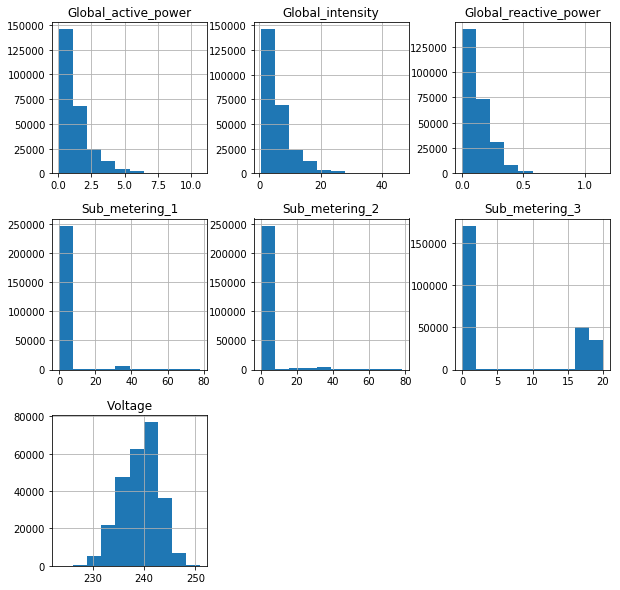

In [166]:
df.hist(figsize = (10,10));

In [167]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


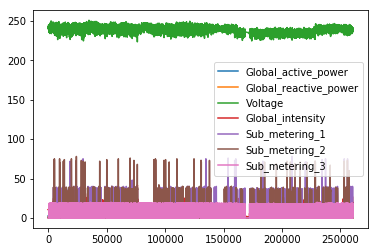

In [168]:
df.plot(); # Lots of data and the graph is meaningless


Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [169]:
first_thousand = df.iloc[:1000]# Answer here

In [170]:
seventy_fivek = df.iloc[75000:76000]

Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [171]:
first_thousand.describe()# Answer here - explain your code and reasoning with extra cells for explanation.

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [172]:
seventy_fivek.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.817320,0.086288,239.81412,7.574400,0.0,0.249000,6.926000
std,1.172717,0.074975,2.10217,4.928638,0.0,0.552543,8.534833
min,0.252000,0.000000,233.84000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.47000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.74500,6.400000,0.0,0.000000,0.000000
75%,2.385000,0.114000,241.40250,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.97000,35.000000,0.0,2.000000,18.000000


The data in the smaller dataframes does not reflect the true population standard deviation and the mean. The data with the smaller 
entries (1000) has much lower standard deviation and mean than the population mean and standard deviation. The dataframe that starts
at 75 000 has better standard deviation and mean compared to the population. However, since the data was not randomly selected, they are not true representative samples
of the population. This can also be seen from the 75 percentile values which is 0 for 1000 entries and 17 for data entries starting at
75 000

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [173]:
df_small = df.sample(n = 10000)#Random sampling of 10 000 rows of data

In [174]:
df_small.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.170940,0.122699,239.172702,5.000660,1.367200,1.635500,5.875400
std,1.195296,0.111710,3.592798,5.063337,6.762214,6.519562,8.201841
min,0.084000,0.000000,224.240000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.570000,1.400000,0.000000,0.000000,0.000000
50%,0.574000,0.104000,239.600000,2.600000,0.000000,0.000000,0.000000
75%,1.612000,0.192000,241.782500,6.800000,0.000000,1.000000,17.000000
max,9.316000,0.856000,249.200000,41.200000,75.000000,73.000000,19.000000


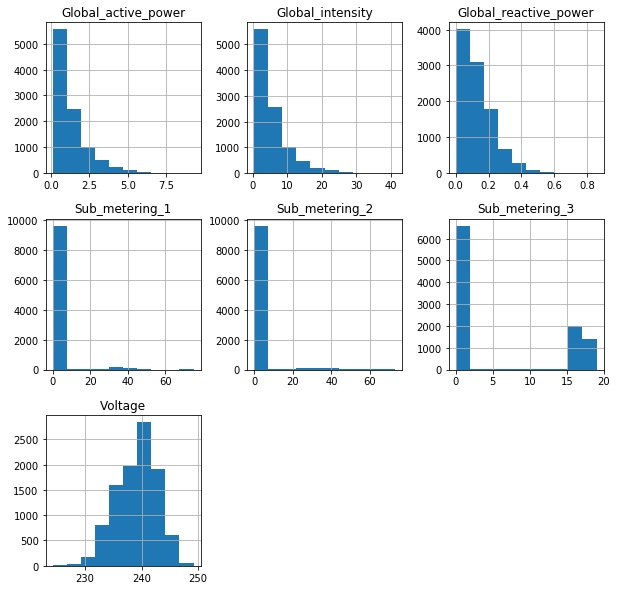

In [175]:
df_small.hist(figsize = (10,10));

<b>Voltage data is normally distributed, while entries on Globa_ative, Global_reactive and Global_intensity are normally distributed
but positively skewed.

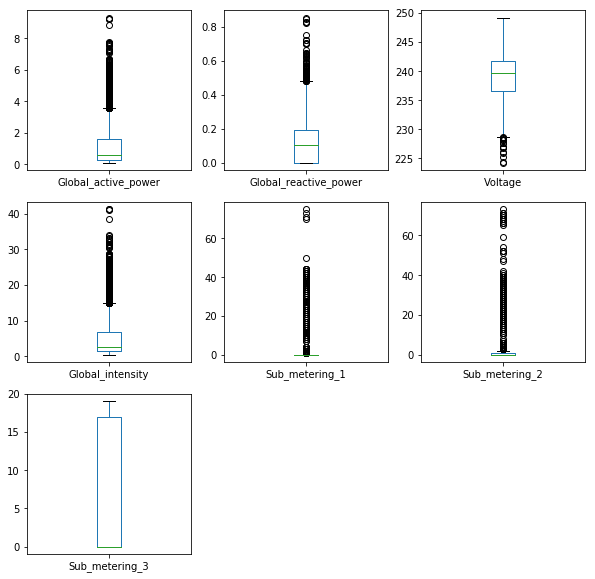

In [176]:
df_small.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (10,10));

<b> From the box and whisker plot, there are a lot of outliers in the data. Sub_metering_2 is by far the worst in outliers, but outliers
can also be found in sub_metering_1, Global_intensity, Global_active and Globa_reactive_power. Voltage has the least amount of outliers
and Sub_metering_3 has no outliers.

This is a much better representation of the population mean and standard deviation. This values approximate the true values.

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

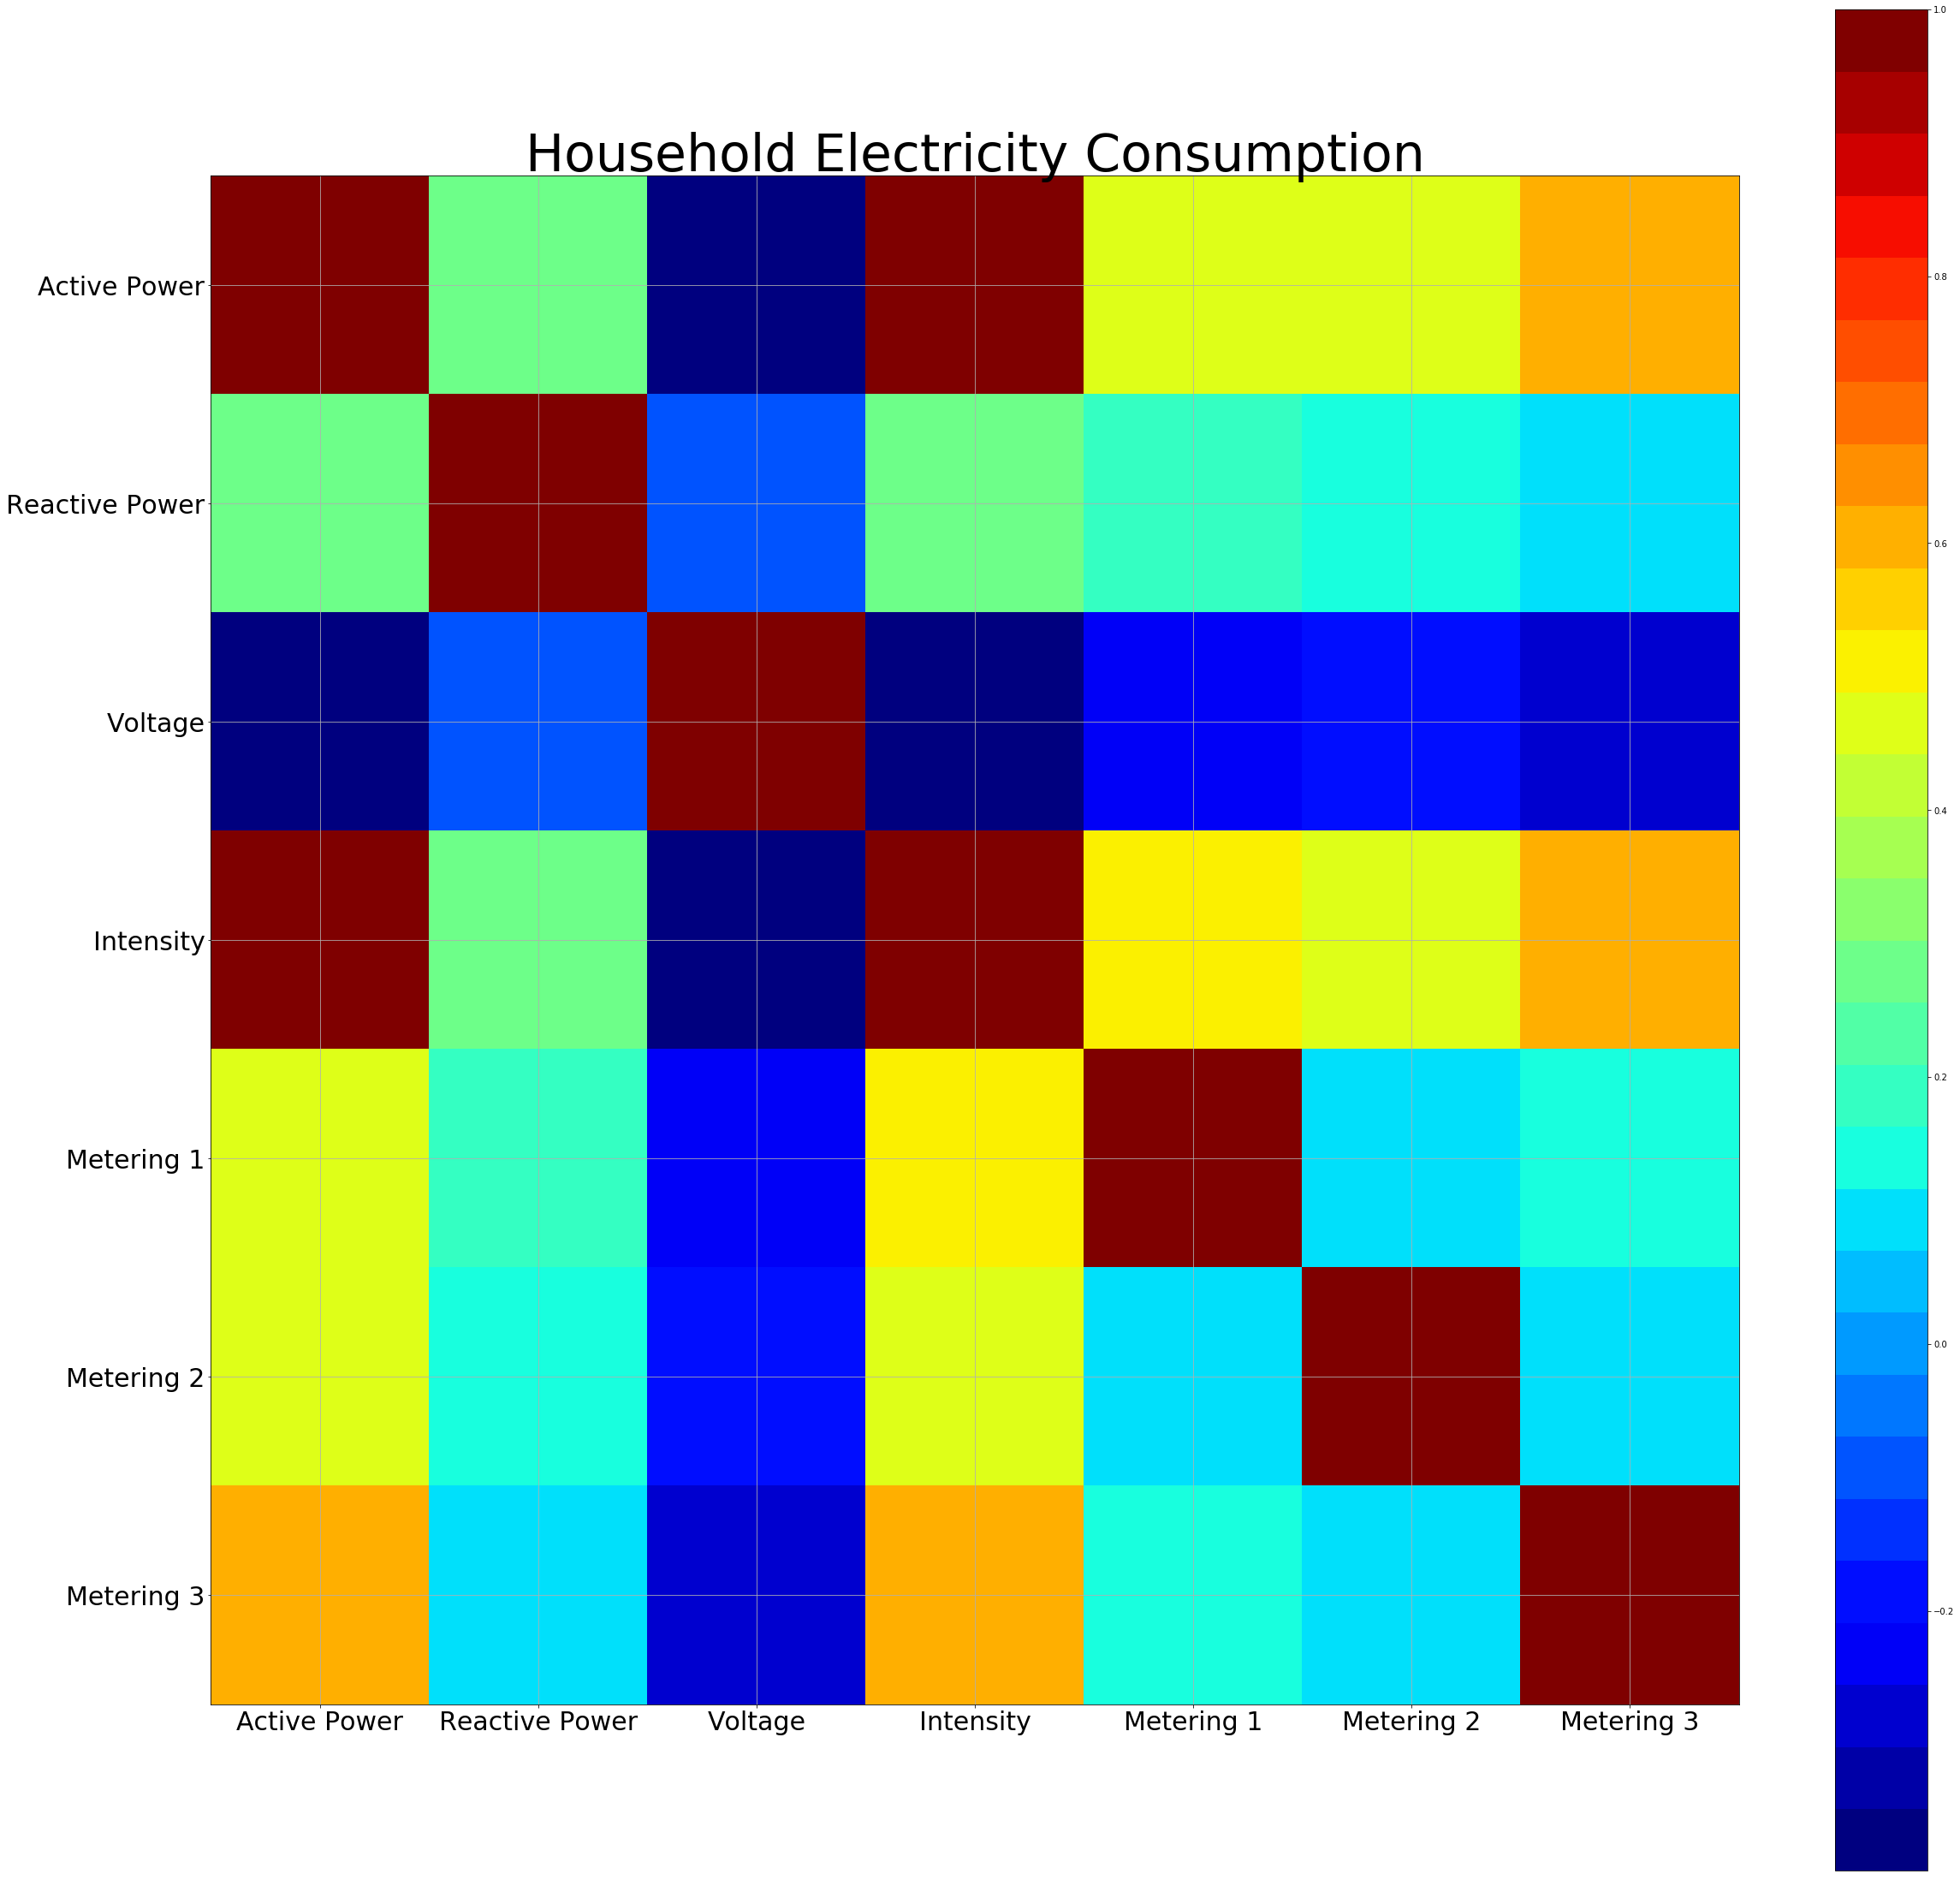

In [177]:
names = ['Active Power', 'Reactive Power', 'Voltage','Intensity', 'Metering 1', 'Metering 2','Metering 3']

correlations = df_small.corr()
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
ax.grid(True)
plt.title('Household Electricity Consumption', fontsize = 60)
cax = ax.imshow(correlations, interpolation = 'nearest', cmap = cmap)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, fontsize = 30);
ax.set_yticklabels(names, fontsize = 30);


<b>Global Active power and Global Intensity are highly positively correlated
Global Active  power and Voltage are also negatively correlated


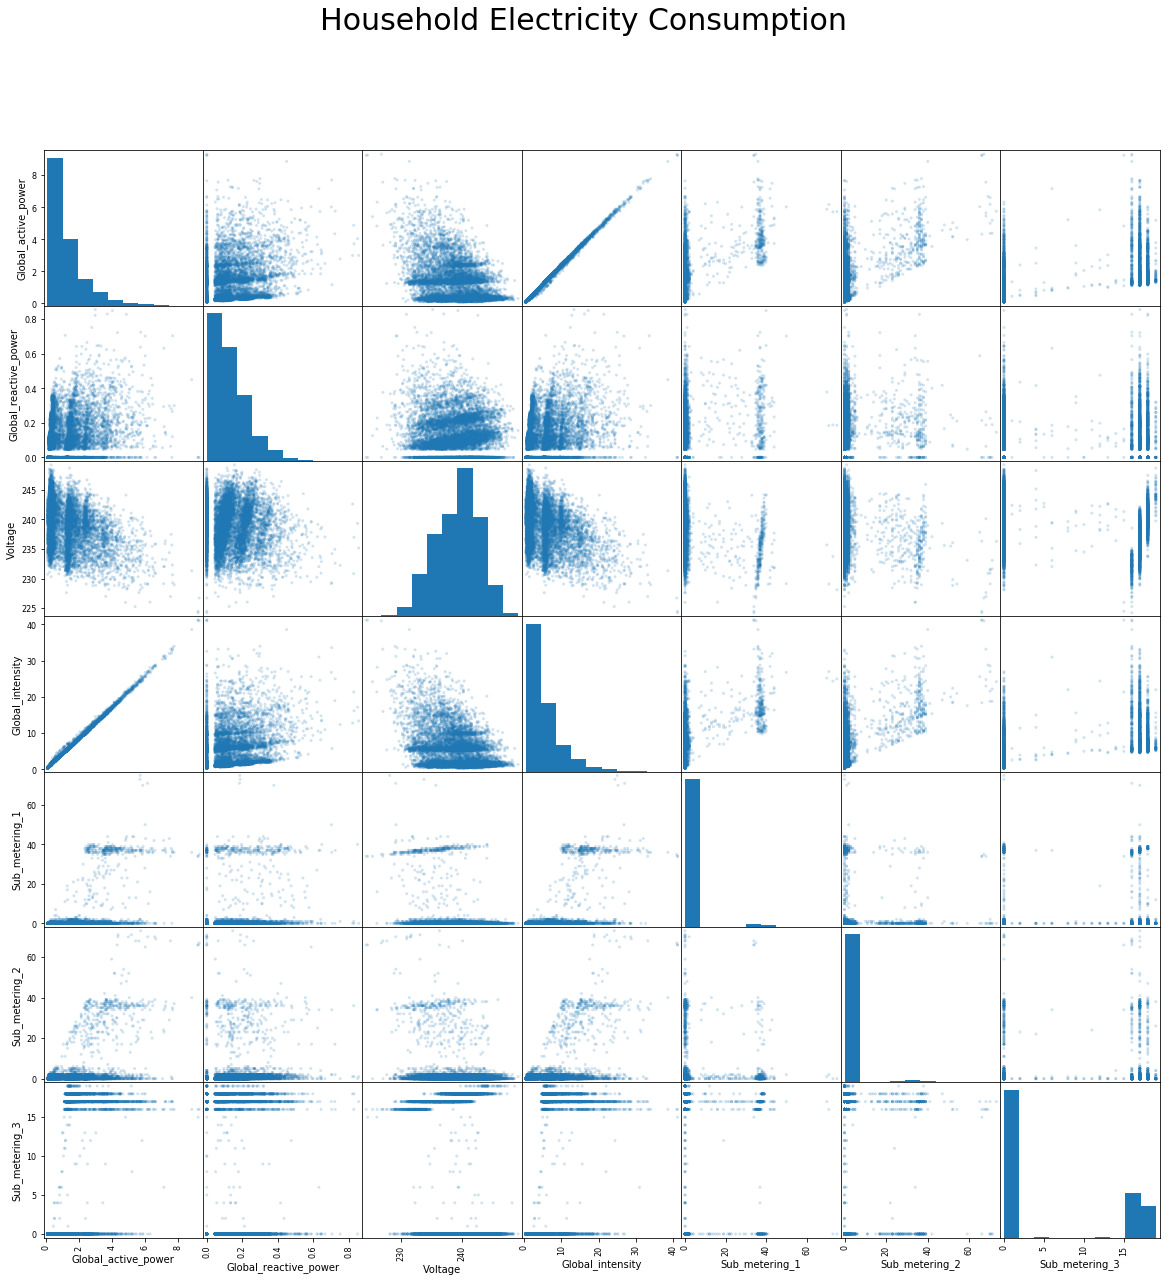

In [178]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_small, alpha = 0.2, figsize = (20,20));
plt.suptitle('Household Electricity Consumption', fontsize = 30);

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [179]:
from sklearn import linear_model

In [180]:
#initializing the model
linear = linear_model.LinearRegression()

In [181]:
explanatory = np.array(df_small['Global_intensity']).reshape(-1,1)
dependent = np.array(df_small['Global_active_power']).reshape(-1,1)

In [182]:
linear.fit(X = explanatory, y = dependent)

# We can extract the model parameters:
print ("Intercept: ", float(linear.intercept_))
print ("Coefficient: ", float(linear.coef_))
print ("Simple Linear Regression Score\t: ", linear.score(explanatory, dependent))

Intercept:  -0.008387658066554282
Coefficient:  0.23583448146175792
Simple Linear Regression Score	:  0.998015927522538


## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

In [183]:
explanatory1 = np.array(df_small['Voltage']).reshape(-1, 1)
explanatory2 = np.array(df_small['Global_reactive_power']).reshape(-1, 1)

In [184]:
INPUT = [[float(explanatory[i]), float(explanatory1[i]), float(explanatory2[i])] for i in range(len(explanatory))]

In [185]:
print(INPUT)

[[10.2, 238.91, 0.068], [2.4, 237.44, 0.314], [5.4, 239.35, 0.0], [5.4, 241.22, 0.114], [1.0, 236.56, 0.122], [2.0, 242.97, 0.11], [5.2, 239.65, 0.098], [9.4, 238.71, 0.052], [6.2, 239.72, 0.096], [8.0, 234.49, 0.066], [2.0, 243.1, 0.258], [24.2, 236.28, 0.146], [9.8, 236.46, 0.082], [9.2, 237.06, 0.0], [7.8, 242.0, 0.122], [1.0, 239.37, 0.0], [2.0, 241.61, 0.23], [1.2, 241.19, 0.122], [1.4, 244.54, 0.12], [0.8, 237.53, 0.0], [1.0, 236.15, 0.118], [2.2, 235.01, 0.064], [5.0, 235.34, 0.0], [5.2, 245.99, 0.046], [0.8, 241.16, 0.0], [9.2, 234.41, 0.088], [0.8, 242.31, 0.0], [0.6, 240.08, 0.0], [9.6, 239.39, 0.056], [1.2, 233.59, 0.0], [0.8, 237.25, 0.046], [12.8, 238.22, 0.0], [2.4, 240.41, 0.164], [4.0, 235.11, 0.186], [10.0, 240.07, 0.052], [6.0, 240.43, 0.08], [7.2, 245.95, 0.26], [0.4, 243.14, 0.0], [1.0, 238.31, 0.0], [2.8, 245.82, 0.254], [4.8, 240.07, 0.0], [8.4, 242.46, 0.33], [3.0, 240.8, 0.232], [8.0, 239.9, 0.412], [14.0, 243.51, 0.324], [2.2, 236.06, 0.206], [6.4, 242.7, 0.098

In [186]:
multi_linear = linear_model.LinearRegression()

In [187]:
multi_linear.fit(X = INPUT, y = dependent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [188]:
# intercept + coef + score
print("Intercept: ", float(multi_linear.intercept_))
print("Coefficient: ", multi_linear.coef_)
print("Score: ", multi_linear.score(INPUT, dependent))

Intercept:  -1.053211973947289
Coefficient:  [[ 0.23816168  0.00440977 -0.17530963]]
Score:  0.9984041479665262


### Multi-Linear regression on larger dataset:

In [189]:
realexpla = np.array(df['Global_intensity']).reshape(-1,1)
dependent = np.array(df['Global_active_power']).reshape(-1,1)
realexpla1 = np.array(df['Voltage']).reshape(-1, 1)
realexpla2 = np.array(df['Global_reactive_power']).reshape(-1, 1)

In [190]:
INPUT = [[float(realexpla[i]), float(realexpla1[i]), float(realexpla2[i])] for i in range(len(realexpla))]

In [191]:
multi_linear = linear_model.LinearRegression()
multi_linear.fit(X = INPUT, y = dependent)

# intercept + coef + score
print("Intercept: ", float(multi_linear.intercept_))
print("Coefficient: ", multi_linear.coef_)
print("Score: ", multi_linear.score(INPUT, dependent))

Intercept:  -1.0047324946671141
Coefficient:  [[ 0.23850428  0.00420315 -0.17992415]]
Score:  0.9983679187758934


## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
logistic = LogisticRegression(solver = 'newton-cg')

In [194]:
result = []
for index, row in df_small.iterrows():
    if row['Sub_metering_1'] > row['Sub_metering_2']:
        result.append(1)
    else:
        result.append(0)
df_small['Comparison'] = result

In [195]:
df_small

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Comparison
59579,11/2/07,8:59:00,2.470,0.068,238.91,10.2,0.0,0.0,0.0,0
209041,26/5/2007,4:01:00,0.476,0.314,237.44,2.4,0.0,1.0,0.0,0
58639,10/2/07,17:19:00,1.300,0.000,239.35,5.4,0.0,0.0,17.0,0
230727,10/6/07,5:27:00,1.296,0.114,241.22,5.4,0.0,0.0,17.0,0
185412,9/5/07,18:12:00,0.230,0.122,236.56,1.0,0.0,0.0,0.0,0
251866,24/6/2007,21:46:00,0.400,0.110,242.97,2.0,0.0,2.0,0.0,0
177070,3/5/07,23:10:00,1.276,0.098,239.65,5.2,0.0,0.0,18.0,0
75157,22/2/2007,4:37:00,2.254,0.052,238.71,9.4,0.0,0.0,0.0,0
139350,7/4/07,18:30:00,1.486,0.096,239.72,6.2,0.0,2.0,19.0,0
207183,24/5/2007,21:03:00,1.796,0.066,234.49,8.0,0.0,22.0,0.0,0


In [196]:
dependent = np.array(df_small['Comparison']).reshape(-1, 1)
INPUT = np.array(df_small['Voltage']).reshape(-1, 1)

In [197]:
result = logistic.fit(X = INPUT, y = dependent.ravel());

In [198]:
print("Score: ", result.score(INPUT, dependent))

Score:  0.9329


In [199]:
df_small.groupby('Comparison').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Comparison,,,,,,,
0,1.047436,0.118167,239.358432,4.472262,0.087353,1.661415,5.489603
1,2.890779,0.185815,236.586343,12.358806,19.189552,1.274627,11.247761


In [200]:
print('Probability: ', result.predict_proba(INPUT))

Probability:  [[0.94397595 0.05602405]
 [0.92537184 0.07462816]
 [0.94863678 0.05136322]
 ...
 [0.83972186 0.16027814]
 [0.9820651  0.0179349 ]
 [0.96555381 0.03444619]]


The dependent variable should be dichotomous for logistic regression, and we have managed to achieve that by putting a value
of 1 for when kitchen power consumption is more than laundry room power consumption and 0 when it is not. The input used, which in
this case is 'Voltage' has outliers. In actuality, before starting logistic regression, the data should have been cleaned of outliers.

The score is $ score\approx 0.93$. The issue I have is that the we have not split the training and test sets such that the model fitting
and scoring / prediction doesnt come of the same dataset. This could present a false positive for data analysis.

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

## HOW DID TWO SMALL SUBSAMPLES (1000 ROWS EACH) DIFFER: ANSWER BELOW

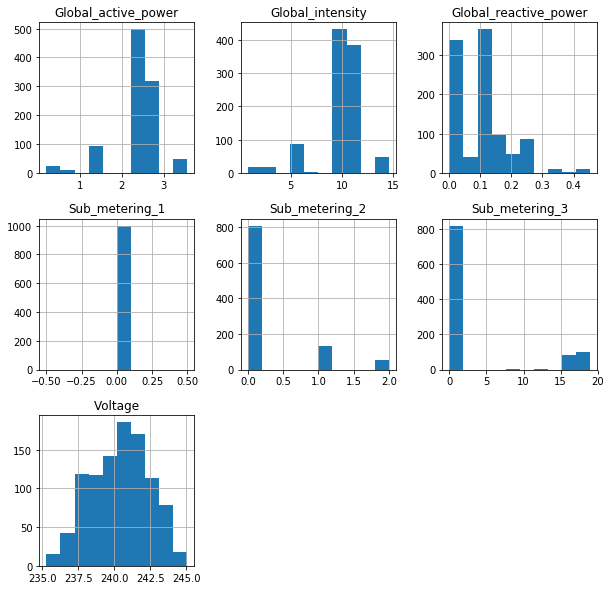

In [201]:
first_thousand.hist(figsize = (10,10));

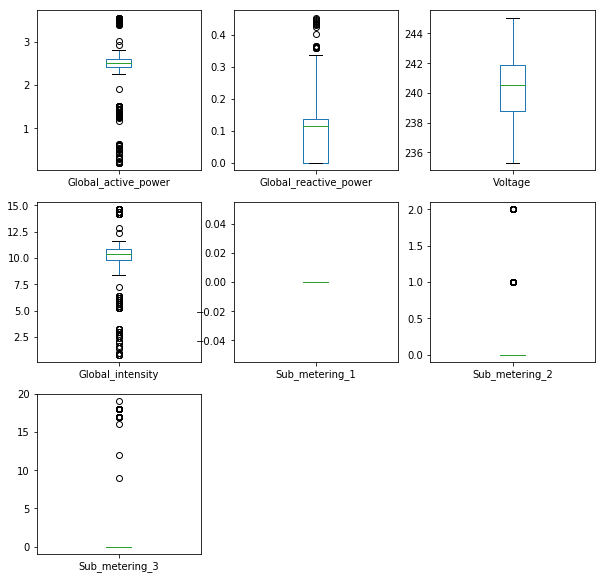

In [202]:
first_thousand.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (10,10));

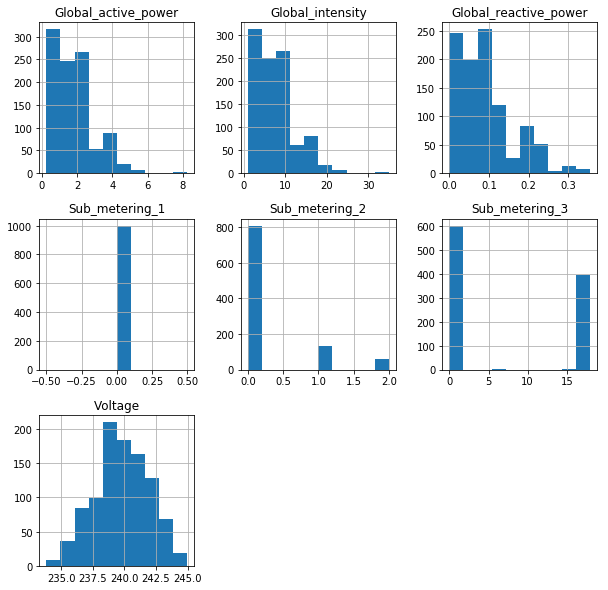

In [203]:
seventy_fivek.hist(figsize = (10,10));

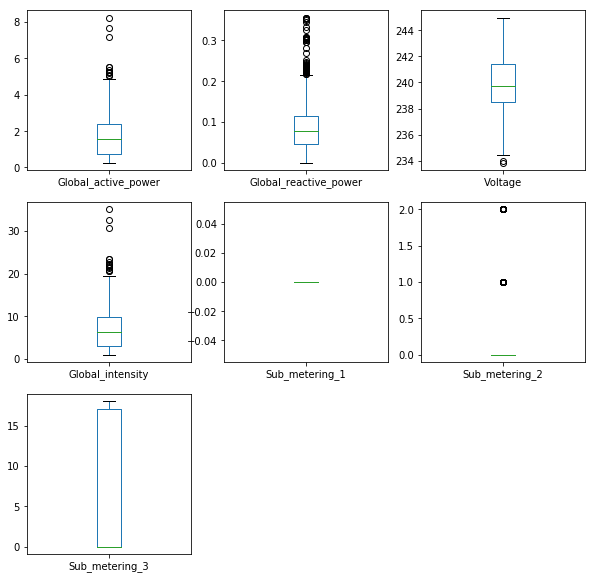

In [204]:
seventy_fivek.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (10,10));

In [205]:
first_thousand.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [206]:
seventy_fivek.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.817320,0.086288,239.81412,7.574400,0.0,0.249000,6.926000
std,1.172717,0.074975,2.10217,4.928638,0.0,0.552543,8.534833
min,0.252000,0.000000,233.84000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.47000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.74500,6.400000,0.0,0.000000,0.000000
75%,2.385000,0.114000,241.40250,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.97000,35.000000,0.0,2.000000,18.000000


From the histograms, the dataframes are quite different as both dont have well formed histograms for Global Active, Reactive and Intensity
The distributions for the second dataframe or seventy_fivek in this case is more well formed than for the first_thousand dataframe
The boxplots show this is a bad sample as there is no discernible distribution for sub_metering 1, 2 and 3 for first_thousand. The second
dataframe has a visible distribution for submetering 3. But overall, very bad samples.

Using the describe() function, the means and standard deviations for both dataframes are very different to each other, eventhough
they both hold equal datapoints (1000). The data is highly biased because of lack of random sampling.

## WHAT TIME OF DAY IS THE KITCHEN USED: ANSWER BELOW

In [207]:
import datetime

In [210]:
time = pd.to_datetime(df_small['Time'], format='%H:%M:%S', utc=False)

In [211]:
time.head()

59579    1900-01-01 08:59:00
209041   1900-01-01 04:01:00
58639    1900-01-01 17:19:00
230727   1900-01-01 05:27:00
185412   1900-01-01 18:12:00
Name: Time, dtype: datetime64[ns]

In [212]:
hours = time.dt.hour

In [213]:
hours.head()

59579      8
209041     4
58639     17
230727     5
185412    18
Name: Time, dtype: int64

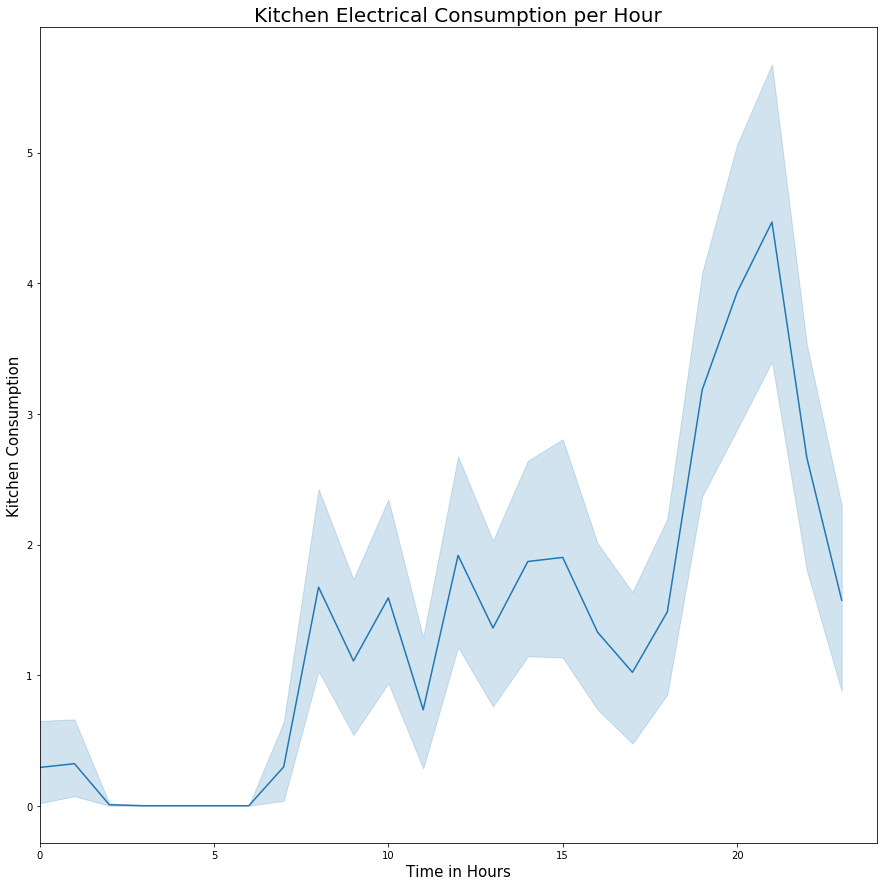

In [215]:
plt.figure(figsize = (15,15))
sns.lineplot(x = hours, y = df_small['Sub_metering_1'], data = df_small);
plt.title('Kitchen Electrical Consumption per Hour', fontsize = 20);
plt.xlim(0,24);
plt.xlabel('Time in Hours', fontsize = 15);
plt.ylabel('Kitchen Consumption', fontsize = 15);

<b> From the lineplot above, electricity in the kitchen is used mostly between the hours of 8 - 10 AM, and 8 - 10 PM. However lunchour
consumption from around 12:30 PM to 17:00 PM stays somewhat constant and starts rising steadily from 17:00 PM to 8 PM As more
and more people arrive home and start dinner preparations.

## WHICH SUBMETERING ZONE USE THE MOST POWER: ANSWER BELOW

In [217]:
df_small.mean()

Global_active_power        1.170940
Global_reactive_power      0.122699
Voltage                  239.172702
Global_intensity           5.000660
Sub_metering_1             1.367200
Sub_metering_2             1.635500
Sub_metering_3             5.875400
Comparison                 0.067000
dtype: float64

<b> Sub_metering_3 has a mean value of 5.875. But is this significantly more than that of Sub_metering_1 and Sub_metering_2?
For this comparison I did a hypothesis test

In [219]:
kitchen = df_small['Sub_metering_1'].astype(float)
laundry = df_small['Sub_metering_2'].astype(float)
utilities = df_small['Sub_metering_3'].astype(float)

Formulating the hypothesis
We can now state our hypothesis. We are interested in whether there is no difference between the consumption patterns of the 3 different zones:

𝐻0 :  𝜇1 = 𝜇2 = 𝜇3 = 0  , i.e., the mean difference is zero. There is no difference in the consumption patterns 3 different zones

𝐻1 :  𝜇𝑑≠0 , a 1-WAY ANOVA. There is a difference in consumption patterns of the 3 different zones.

In [220]:
import scipy.stats as stats

In [221]:
stats.f_oneway(kitchen, laundry, utilities)

F_onewayResult(statistic=1233.826519254957, pvalue=0.0)

<b>The results of the test suggest the groups dont have the same sample means, hence they cannot be using power in the same way.
The $\ p = 0.0$, which is lower than the $\alpha = 0.05$. We reject the null hypothesis for alternative hypothesis. This means there is a significant difference between the means of kitchen, laundry and utilities

For pair-wise comparison, the null hypothesis can be reworded as:
    There is no difference between consumption of kitchen and laundry
    There is no difference between consumption of kitchen and utilities
    There is no difference between consumption of laundry and utilities
The alternate hypothesis will be the opposite of this statements for the 3 tests to follow:

In [222]:
stats.ttest_ind(kitchen, laundry)#Kitchen, laundry pair

Ttest_indResult(statistic=-2.856321256167324, pvalue=0.0042902284278595664)

In [223]:
stats.ttest_ind(kitchen, utilities) #kitchen, utilities pair

Ttest_indResult(statistic=-42.41000252070525, pvalue=0.0)

In [224]:
stats.ttest_ind(laundry, utilities)

Ttest_indResult(statistic=-40.467288377908844, pvalue=0.0)

<b> Having completed a pairwise statistical comparison of the 3 means, I can therefore conclude that the utilities or Sub_metering_3
zone consumes more electricity than both kitchen and laundry as the $\ p = 0$ in those instances where the comparison was carried out.
which is less than $ \alpha = 0.05$. We therefore reject the null hypothesis for the alternative hypothesis in all three tests.
    
    Therefore Sub_metering_3 used the most power of all the zones